## Assignment 11

Let's install and import all the required libraries for this assignment

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [25]:
df = pd.read_csv("../Assignment11/data/ecommerce_sales_data (2).csv", parse_dates=['Order Date'])
df.set_index('Order Date', inplace = True)

In [26]:
df.sample(5)

,Product Name,Category,Region,Quantity,Sales,Profit
Order Date,,,,,,
2023-08-30,Headphones,Accessories,East,1,111,27.91
2023-06-24,Mouse,Accessories,South,8,5256,1118.16
2024-01-16,Printer,Office,South,1,879,135.00
2023-12-26,Smartphone,Electronics,East,9,828,59.99
2024-08-12,Camera,Electronics,North,4,564,32.80


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3500 entries, 2024-12-31 to 2024-11-01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  3500 non-null   object 
 1   Category      3500 non-null   object 
 2   Region        3500 non-null   object 
 3   Quantity      3500 non-null   int64  
 4   Sales         3500 non-null   int64  
 5   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 191.4+ KB


## Task 1: Line plot

In [28]:
## Creating Data Group

salestrend_data = df['Sales'].resample('ME').sum()
salestrend_data

Order Date
2022-01-31    341544
2022-02-28    208775
2022-03-31    294660
2022-04-30    230624
2022-05-31    314295
2022-06-30    273851
2022-07-31    214627
2022-08-31    296242
2022-09-30    240211
2022-10-31    324989
2022-11-30    257111
2022-12-31    259041
2023-01-31    343256
2023-02-28    313931
2023-03-31    303391
2023-04-30    280808
2023-05-31    346481
2023-06-30    251686
2023-07-31    320798
2023-08-31    388428
2023-09-30    303409
2023-10-31    253145
2023-11-30    306195
2023-12-31    375064
2024-01-31    282814
2024-02-29    179708
2024-03-31    341563
2024-04-30    310444
2024-05-31    373911
2024-06-30    314268
2024-07-31    309515
2024-08-31    240269
2024-09-30    341926
2024-10-31    314135
2024-11-30    291769
2024-12-31    324997
Freq: ME, Name: Sales, dtype: int64

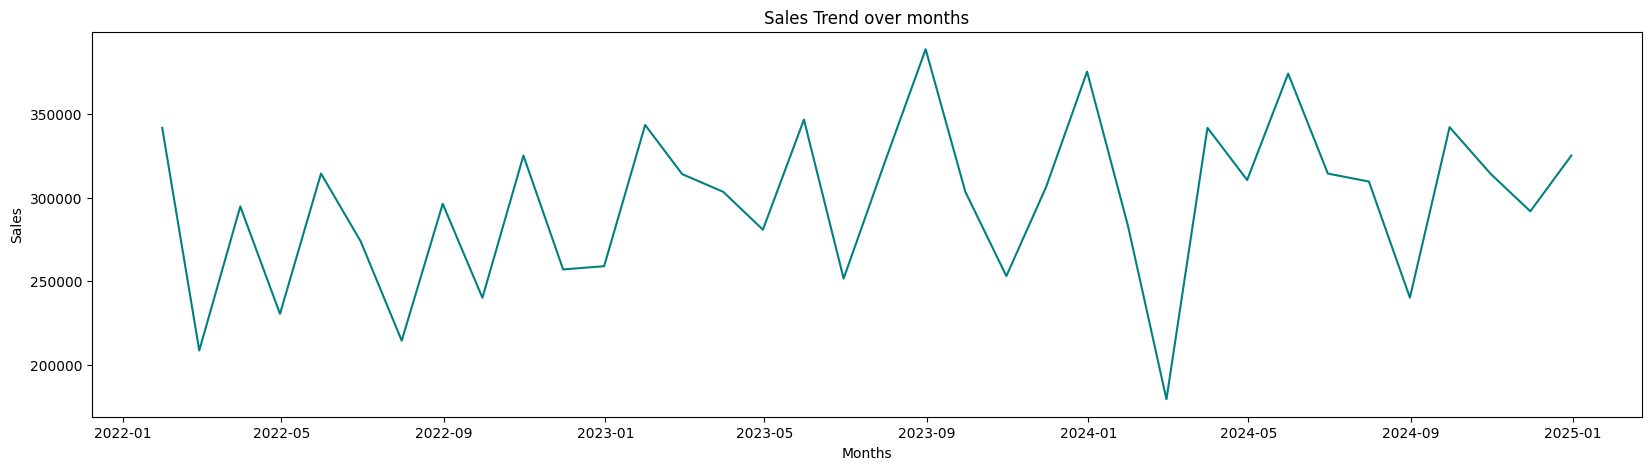

In [29]:
## Plotting a Line plot

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(salestrend_data.index, salestrend_data.values, color='teal')
ax.set_title("Sales Trend over months")
ax.set_xlabel("Months")
ax.set_ylabel("Sales")

plt.show()

## Task 2: Scatter plot

In [30]:
## Creating Data Group

scatter_data = df.groupby('Sales')['Profit'].sum()
scatter_data.sample(10)

Sales
2050     157.13
2367     222.26
1048     107.56
5795     310.60
1624     769.87
2310     202.98
718      169.09
830       58.28
745      151.22
6559    1141.32
Name: Profit, dtype: float64

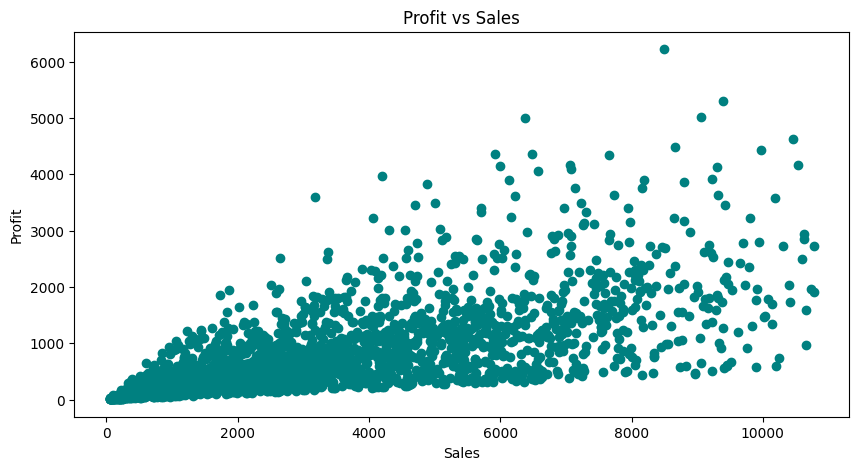

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(scatter_data.index, scatter_data.values, color="teal")
ax.set_title("Profit vs Sales")
ax.set_xlabel("Sales")
ax.set_ylabel("Profit")

plt.show()

## Bar plot

In [32]:
## Creating Data group

bar_data = df.groupby('Category')['Sales'].sum()
bar_data

Category
Accessories    4247591
Electronics    5326074
Office         1094216
Name: Sales, dtype: int64

Text(0, 0.5, 'Sales')

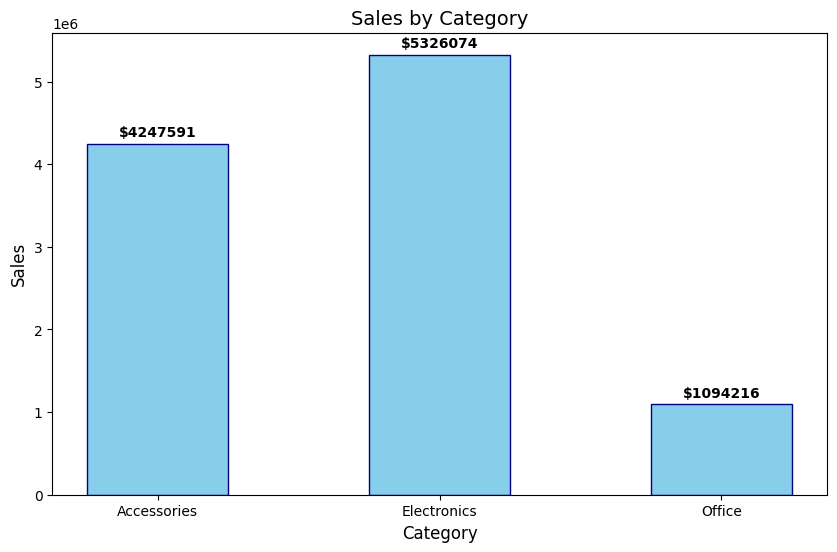

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(bar_data.index, bar_data.values, color='skyblue', edgecolor='navy', width=0.5)
ax.bar_label(bars, padding=3, fmt='$%.0f', fontweight='bold')
ax.set_title("Sales by Category", fontsize = 14)
ax.set_xlabel("Category", fontsize = 12)
ax.set_ylabel("Sales", fontsize = 12)

Text(0, 0.5, 'Sales')

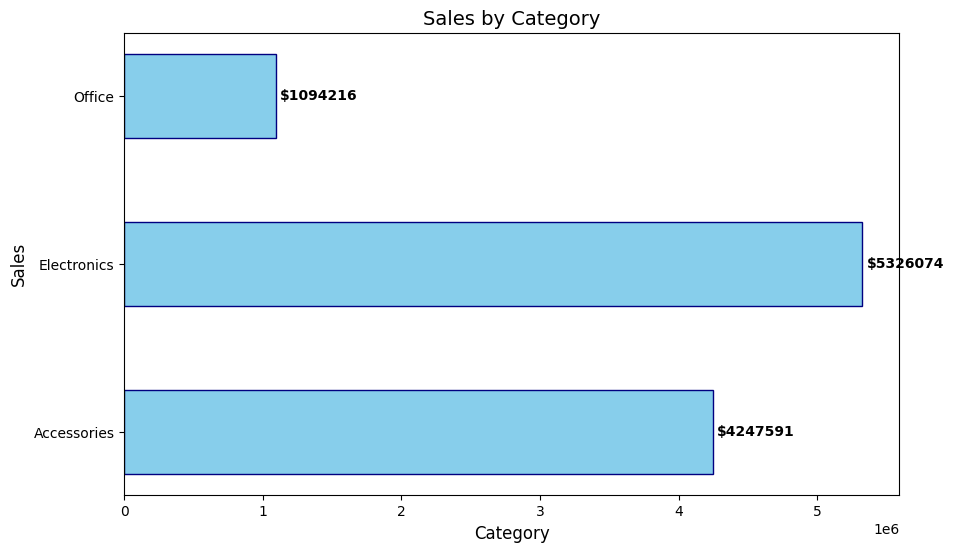

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(bar_data.index, bar_data.values, color='skyblue', edgecolor='navy', height=0.5)
ax.bar_label(bars, padding=3, fmt='$%.0f', fontweight='bold')
ax.set_title("Sales by Category", fontsize = 14)
ax.set_xlabel("Category", fontsize = 12)
ax.set_ylabel("Sales", fontsize = 12)

## Multiple Bar Plot

In [35]:
df['Month'] = df.index.month_name()

# Display the first few rows with the new 'Month' column
df.head()

,Product Name,Category,Region,Quantity,Sales,Profit,Month
Order Date,,,,,,,
2024-12-31,Printer,Office,North,4,3640,348.93,December
2022-11-27,Mouse,Accessories,East,7,1197,106.53,November
2022-05-11,Tablet,Electronics,South,5,5865,502.73,May
2024-03-16,Mouse,Accessories,South,2,786,202.87,March
2022-09-10,Mouse,Accessories,West,1,509,103.28,September


In [36]:
df['Category'].value_counts()

Category
Electronics    1742
Accessories    1401
Office          357
Name: count, dtype: int64

In [37]:
electronics = df[df['Category'] == "Electronics"]
accessories = df[df['Category'] == "Accessories"]
office = df[df["Category"] == "Office"]

In [38]:
elec_plot = electronics.groupby('Month')['Sales'].sum()
acc_plot = accessories.groupby('Month')['Sales'].sum()
off_plot = office.groupby('Month')['Sales'].sum()

In [39]:
elec_plot.index = pd.CategoricalIndex(elec_plot.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
acc_plot.index = pd.CategoricalIndex(acc_plot.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
off_plot.index = pd.CategoricalIndex(off_plot.index, categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

elec_plot = elec_plot.sort_index()
acc_plot = acc_plot.sort_index()
off_plot = off_plot.sort_index()

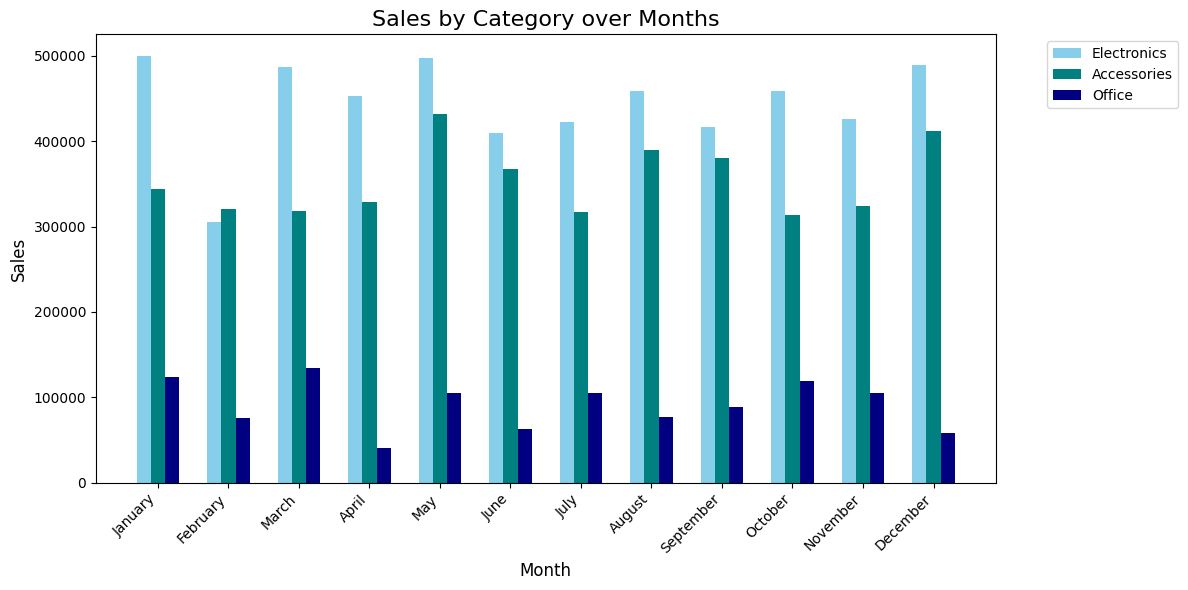

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.2
positions = np.arange(elec_plot.shape[0])

ax.bar(positions - bar_width, elec_plot.values, color='skyblue', label='Electronics', width=bar_width)
ax.bar(positions, acc_plot.values, color="teal", label='Accessories', width=bar_width)
ax.bar(positions + bar_width, off_plot.values, color='navy', label='Office', width=bar_width)

ax.set_title("Sales by Category over Months", fontsize = 16)
ax.set_xlabel("Month", fontsize = 12)
ax.set_ylabel("Sales", fontsize = 12)
ax.set_xticks(positions)
ax.set_xticklabels(elec_plot.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Deepak Antony\AppData\Local\Temp\ipykernel_3304\3583771011.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(elec_plot.index, rotation=45, ha='center')


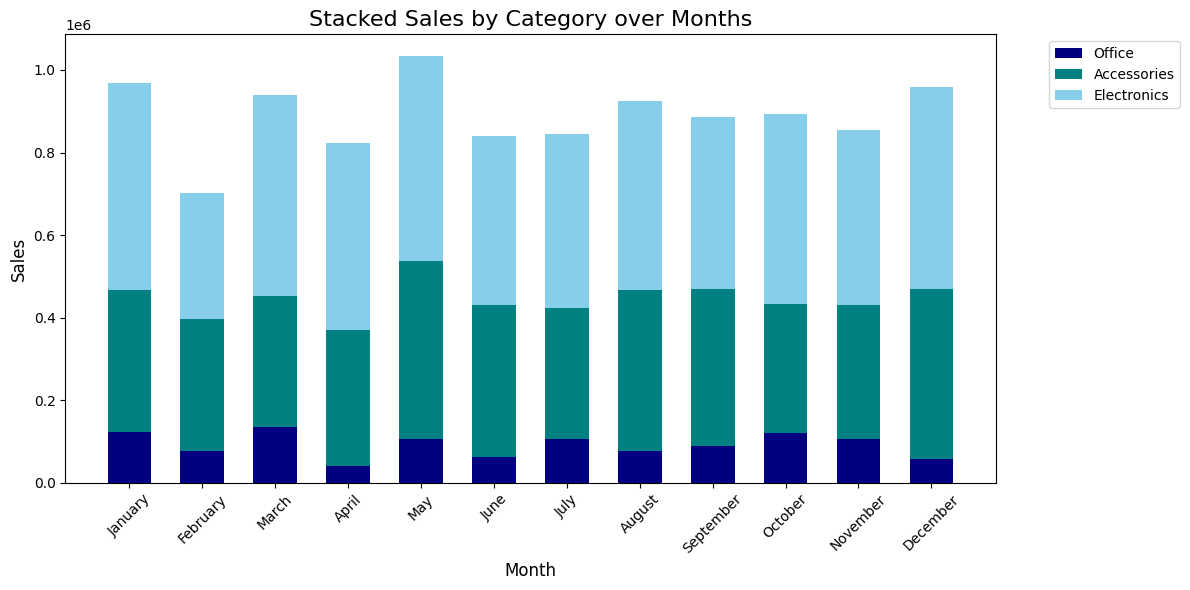

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.6
ax.bar(elec_plot.index, off_plot.values, color='navy', label='Office', width=bar_width)
ax.bar(acc_plot.index, acc_plot.values, color='teal', label='Accessories', width=bar_width, bottom=off_plot.values)
ax.bar(off_plot.index, elec_plot.values, color='skyblue', label='Electronics', width=bar_width, bottom=off_plot.values + acc_plot.values)

ax.set_title("Stacked Sales by Category over Months", fontsize = 16)
ax.set_xlabel("Month", fontsize = 12)
ax.set_ylabel("Sales", fontsize = 12)
ax.set_xticklabels(elec_plot.index, rotation=45, ha='center')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Histogram

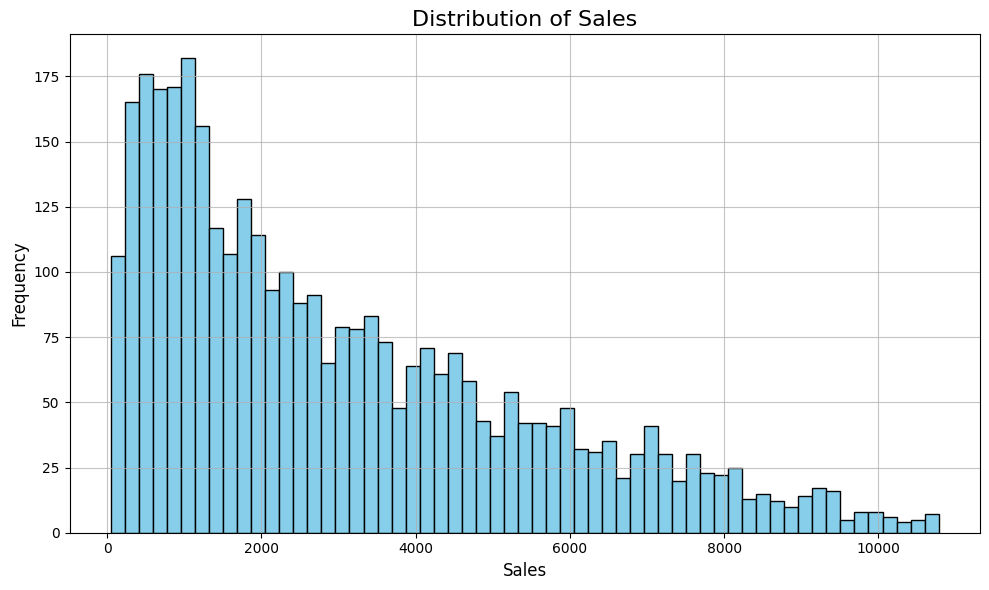

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df['Sales'], bins=np.sqrt(df['Sales'].shape[0]).astype(int), color='skyblue', edgecolor='black')

ax.set_title('Distribution of Sales', fontsize=16)
ax.set_xlabel('Sales', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.grid(alpha=0.75)

plt.tight_layout()
plt.show()

## Pie Chart

In [43]:
pie_data = df.groupby('Region')['Profit'].sum()
pie_data.head()

Region
East     464888.46
North    426314.75
South    458103.27
West     495358.73
Name: Profit, dtype: float64

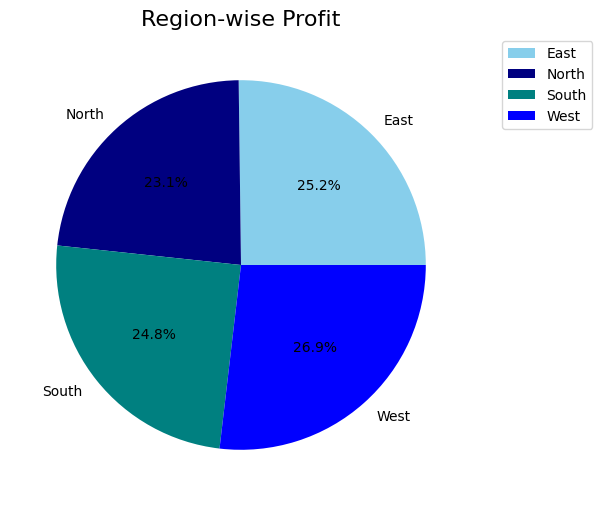

In [44]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.pie(pie_data.values, labels=pie_data.index, autopct='%0.1f%%', colors = ['skyblue', 'navy', 'teal', 'blue'])
ax.set_title("Region-wise Profit", fontsize = 16)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

